In [1]:
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]="6"

import sys
sys.path.append("../")

import mitsuba as mi
import drjit as dr
from matplotlib import pyplot as plt
import numpy as np
import skimage as ski
from helpers.polarization_helpers import *
from helpers.render_helpers import *

print(mi.variants())
mi.set_variant("cuda_ad_spectral_polarized")

['scalar_rgb', 'scalar_spectral', 'scalar_spectral_polarized', 'llvm_ad_rgb', 'llvm_ad_mono', 'llvm_ad_mono_polarized', 'llvm_ad_spectral', 'llvm_ad_spectral_polarized', 'cuda_ad_rgb', 'cuda_ad_mono', 'cuda_ad_mono_polarized', 'cuda_ad_spectral', 'cuda_ad_spectral_polarized']


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0022766627..1.2153894].


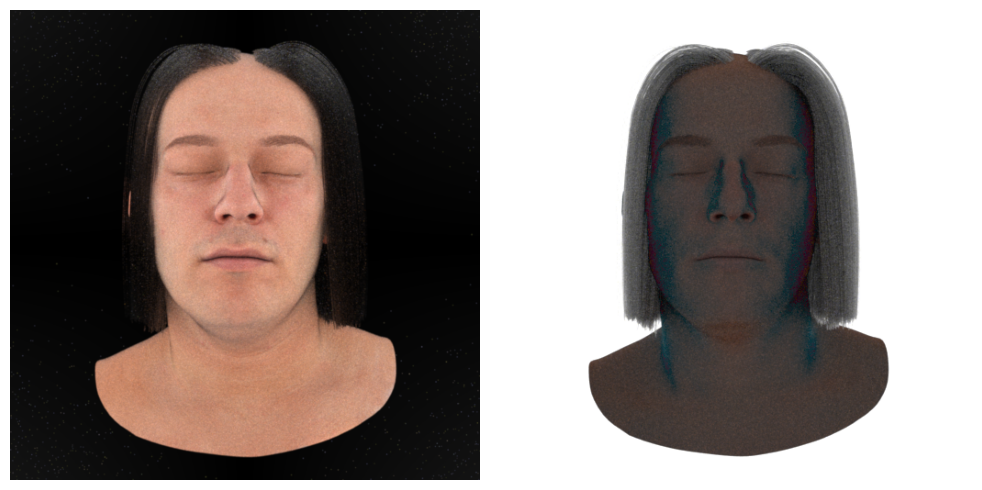

In [ ]:
scene = mi.load_file("../scenes/marcus_light_sphere_hair.xml", res=512)

img_0, img_90 = render_from_angle(scene, 4, 0.5 * np.pi, 0, spp=256)

indirect, direct = separate(img_0, img_90)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.axis("off")
plt.imshow(indirect ** (1.0 / 2.2))

plt.subplot(1, 2, 2)
plt.axis("off")
plt.imshow(direct ** (1.0 / 2.2))

plt.tight_layout()
plt.show()

Rendering: 100%|██████████| 4/4 [04:30<00:00, 67.67s/it]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0068179374..1.1604904].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0005758172..1.161253].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.1611555].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.046307594..1.1600338].


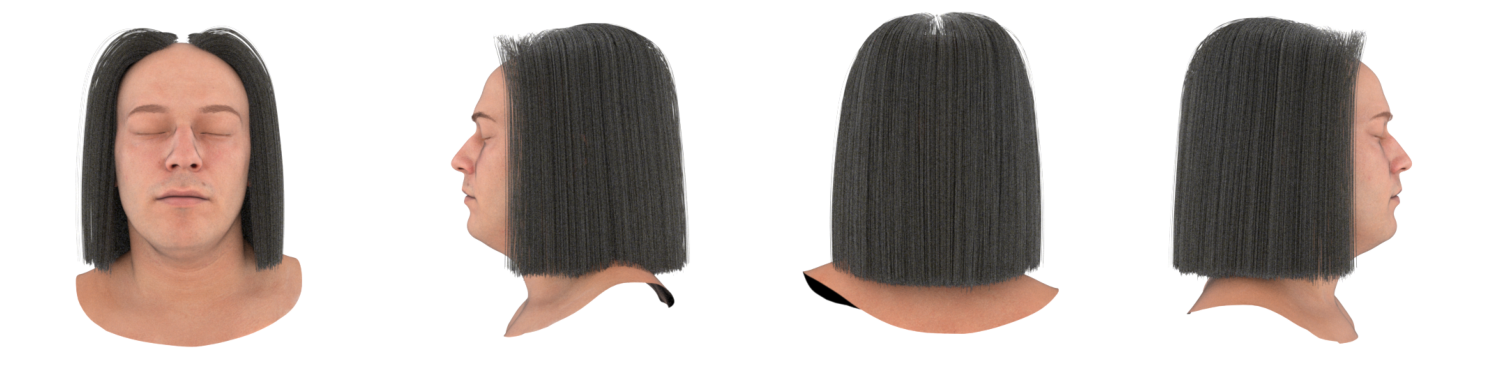

In [2]:
scene = mi.load_file("../scenes/marcus_light_sphere_hair.xml", res=512)

params = mi.traverse(scene)
params["polarizer_cam.to_world"] = mi.Transform4f().translate([10000, 10000, 10000])
params.update()

thetas = np.array([0.5*np.pi]*4)
phis = np.linspace(0, 2 * np.pi, 4, endpoint=False)
radius = 75

imgs = render_from_angles(scene, radius, thetas, phis, polarized=False, spp=256)

plt.figure(figsize=(15,4))

for i, img in enumerate(imgs):
	plt.subplot(1, 4, i+1)
	plt.axis("off")
	plt.imshow(img ** (1.0 / 2.2))

plt.tight_layout()
plt.show()

_Kopf Dimensionen unskaliert:_

- x: -15,29; 15,29
- y: 0; 37,23
- z: -14,01; 14,01

Kopf macht ca. 2/3 der Höhe des Modells aus -> Höhe des Kopfes ungefähr 24 Einheiten

In [13]:
# Calculate Head Bounding Box
scene = mi.load_file("../scenes/marcus_light_sphere_hair.xml")
params = mi.traverse(scene)

positions = np.array(params["head.vertex_positions"]).reshape(-1, 3)
min_pos = positions.min(axis=0)
max_pos = positions.max(axis=0)

print(min_pos)
print(max_pos)

[-15.291506 -18.613869 -14.00991 ]
[15.288444 18.613873 14.014215]


_Haare Dimensionen unskaliert:_

- x: -30.90; 32.50
- y: -22.71; 63.58
- z: -33.90; 24.07

In [25]:
scene = mi.load_file("../scenes/marcus_light_sphere_hair.xml")
params = mi.traverse(scene)

positions = np.array(params["hair.control_points"]).reshape(-1, 4)
min_pos = positions.min(0)
max_pos = positions.max(0)

print(min_pos)
print(max_pos)

[-3.0898701e+01 -2.2708553e+01 -3.3900890e+01  9.7500003e-04]
[3.2495605e+01 6.3677959e+01 2.4073988e+01 9.7500003e-04]
